# Creating a machine learning model that can predict whether or not a customer will churn.

## Imports and reading in data. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory data Analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

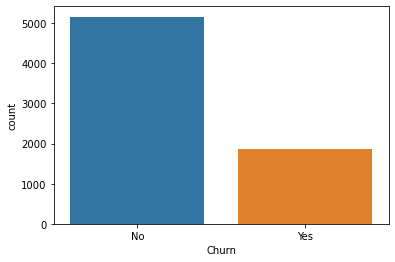

In [7]:
sns.countplot(data=df,x='Churn');

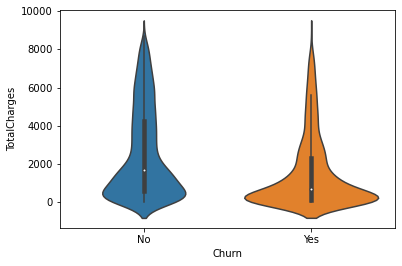

In [8]:
sns.violinplot(data=df,x='Churn',y='TotalCharges');

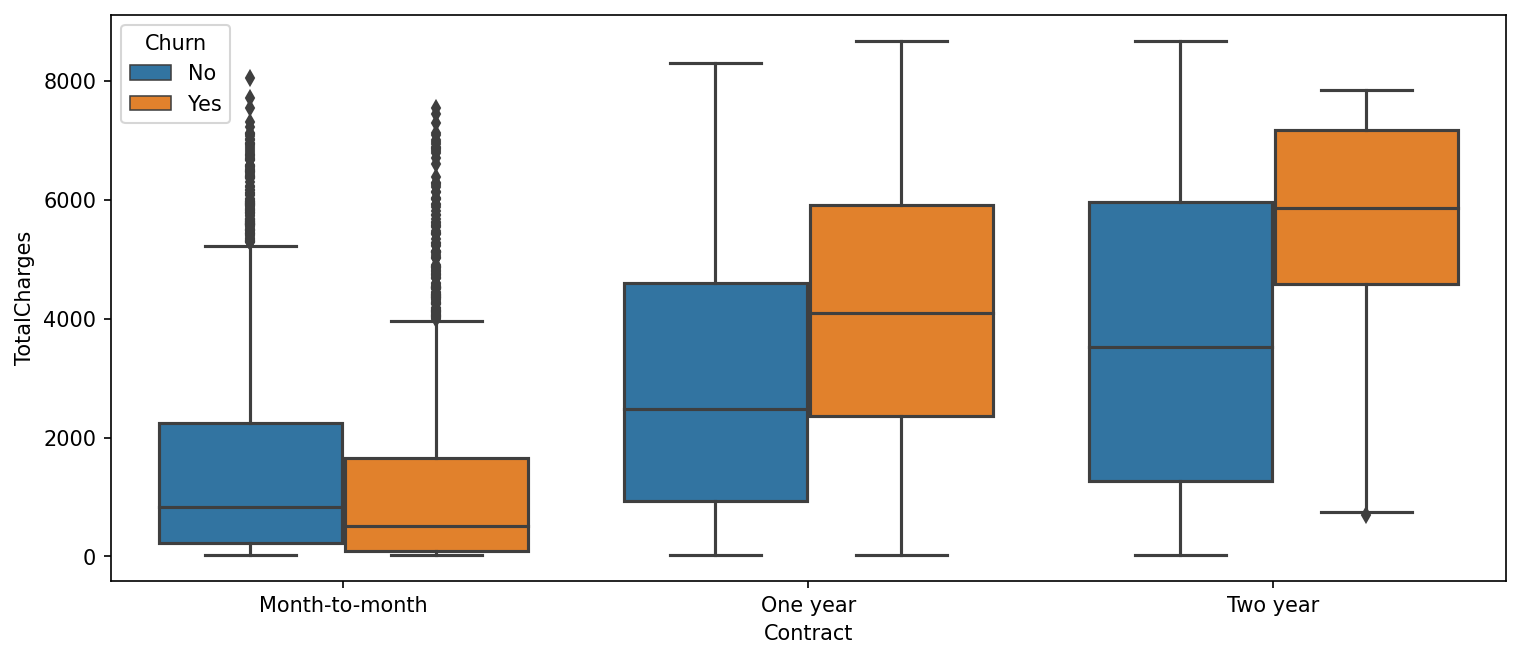

In [9]:
plt.figure(figsize=(12,5),dpi=150)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn');

In [11]:
corr = pd.get_dummies(data=df.drop('customerID',axis=1)).corr()['Churn_Yes'][:-2].sort_values()[1:]

In [12]:
index = corr.index
corr_series = pd.DataFrame(data=corr,index=index)
corr_series

,Churn_Yes
Contract_Two year,-0.301552
OnlineBackup_No internet service,-0.227578
DeviceProtection_No internet service,-0.227578
TechSupport_No internet service,-0.227578
StreamingTV_No internet service,-0.227578
StreamingMovies_No internet service,-0.227578
InternetService_No,-0.227578
OnlineSecurity_No internet service,-0.227578
TotalCharges,-0.199484
PaperlessBilling_No,-0.191454


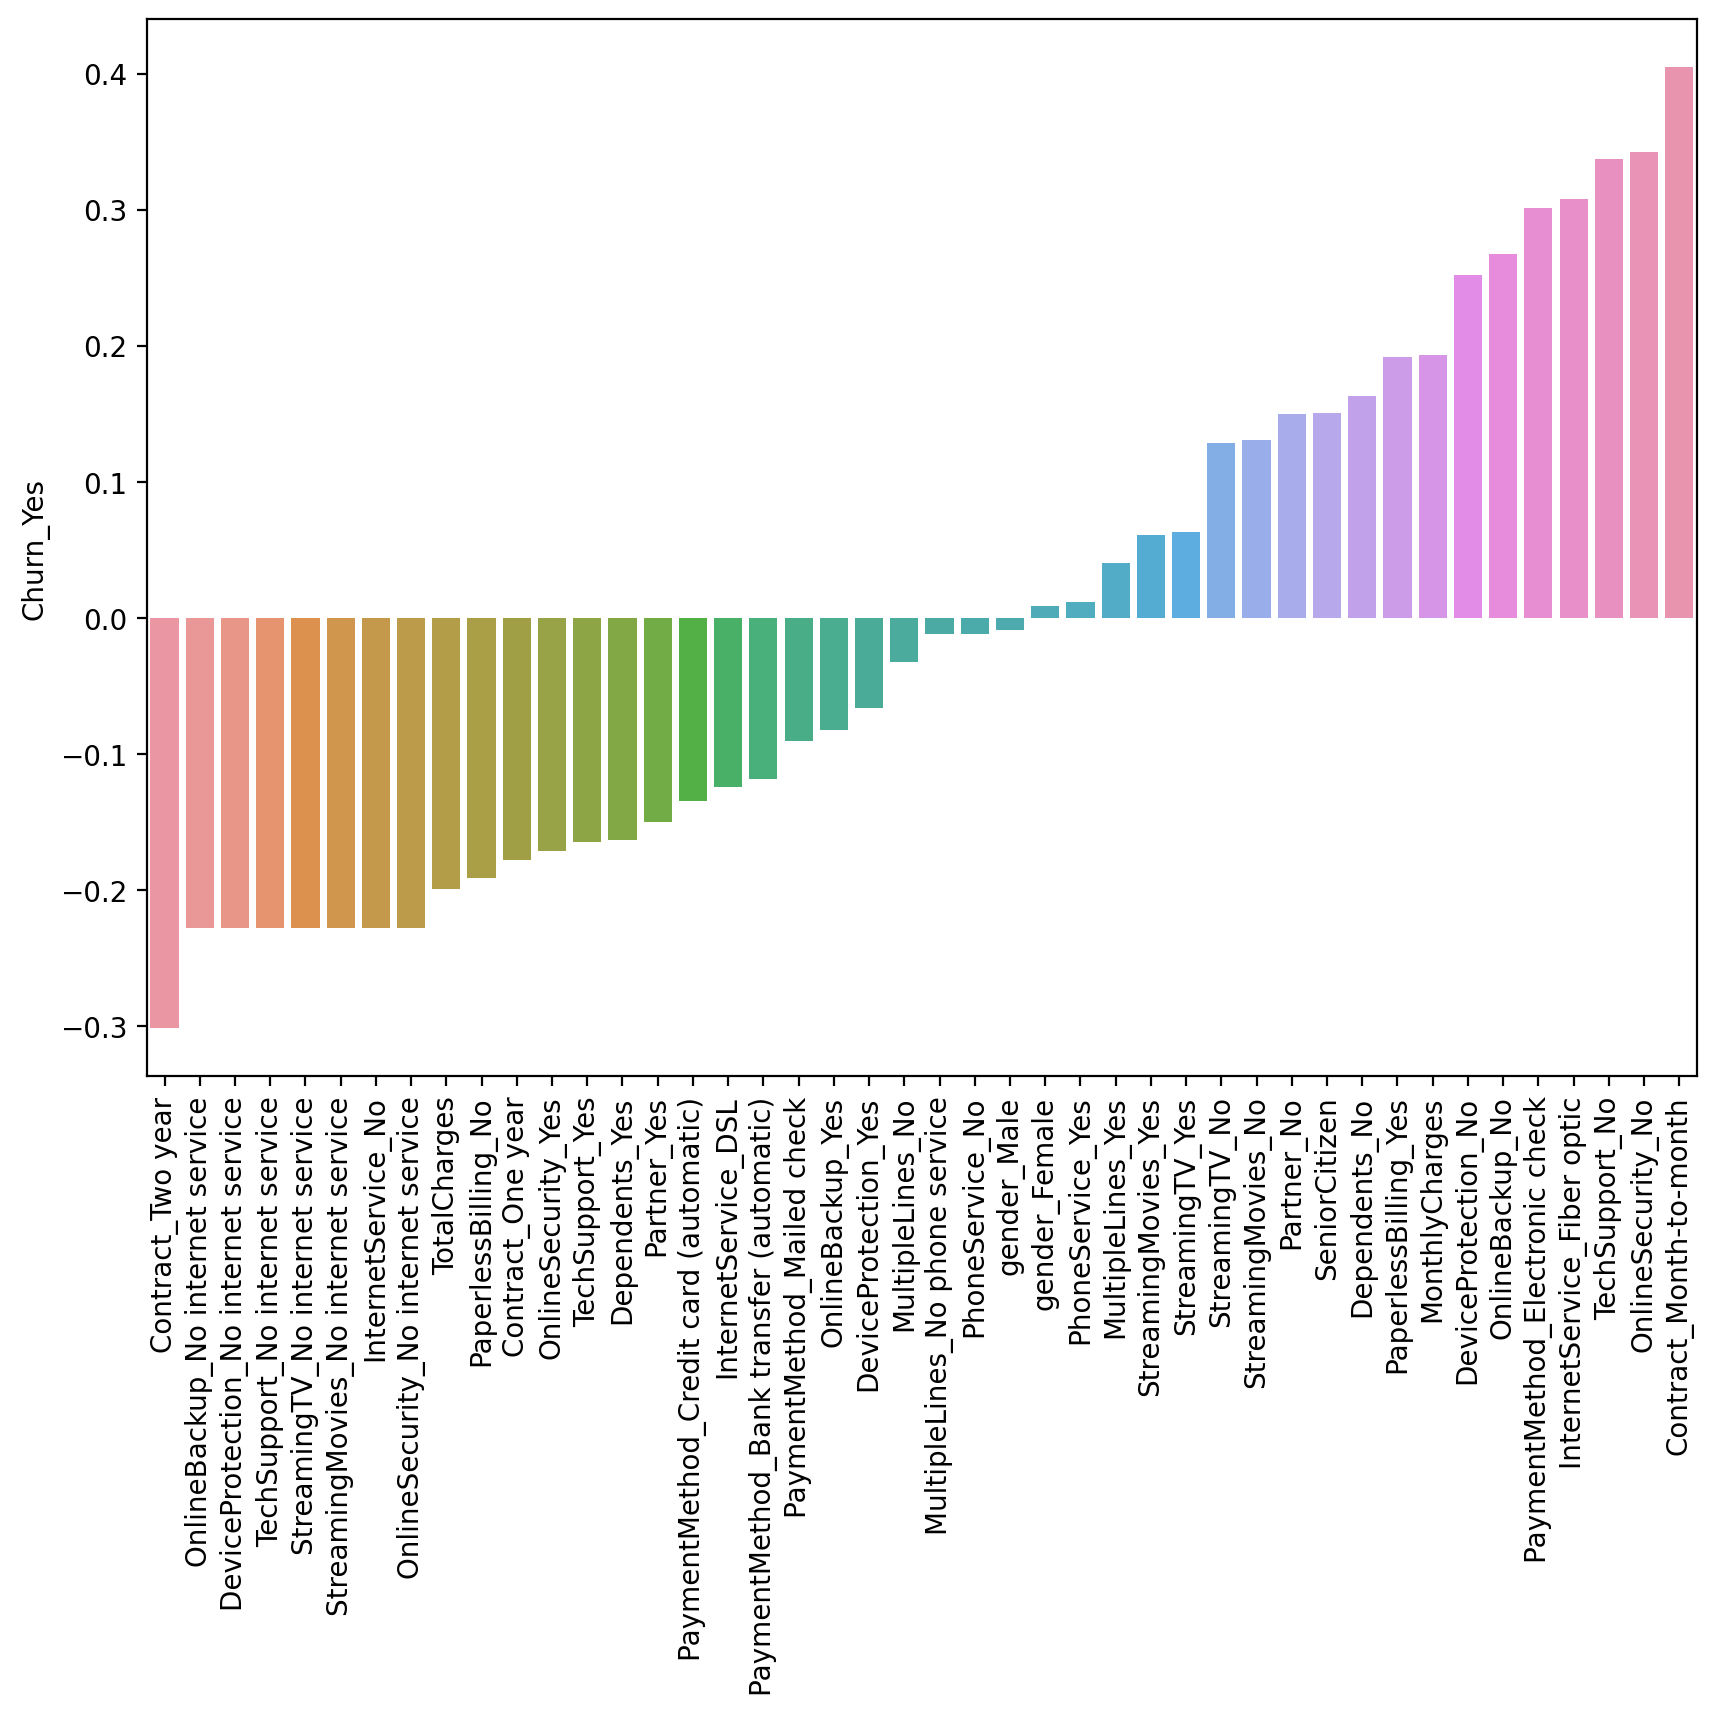

In [13]:
plt.figure(figsize=(10,7),dpi=200)
sns.barplot(data=corr_series,x=corr_series.index,y='Churn_Yes')
plt.xticks(rotation=90);

In [14]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

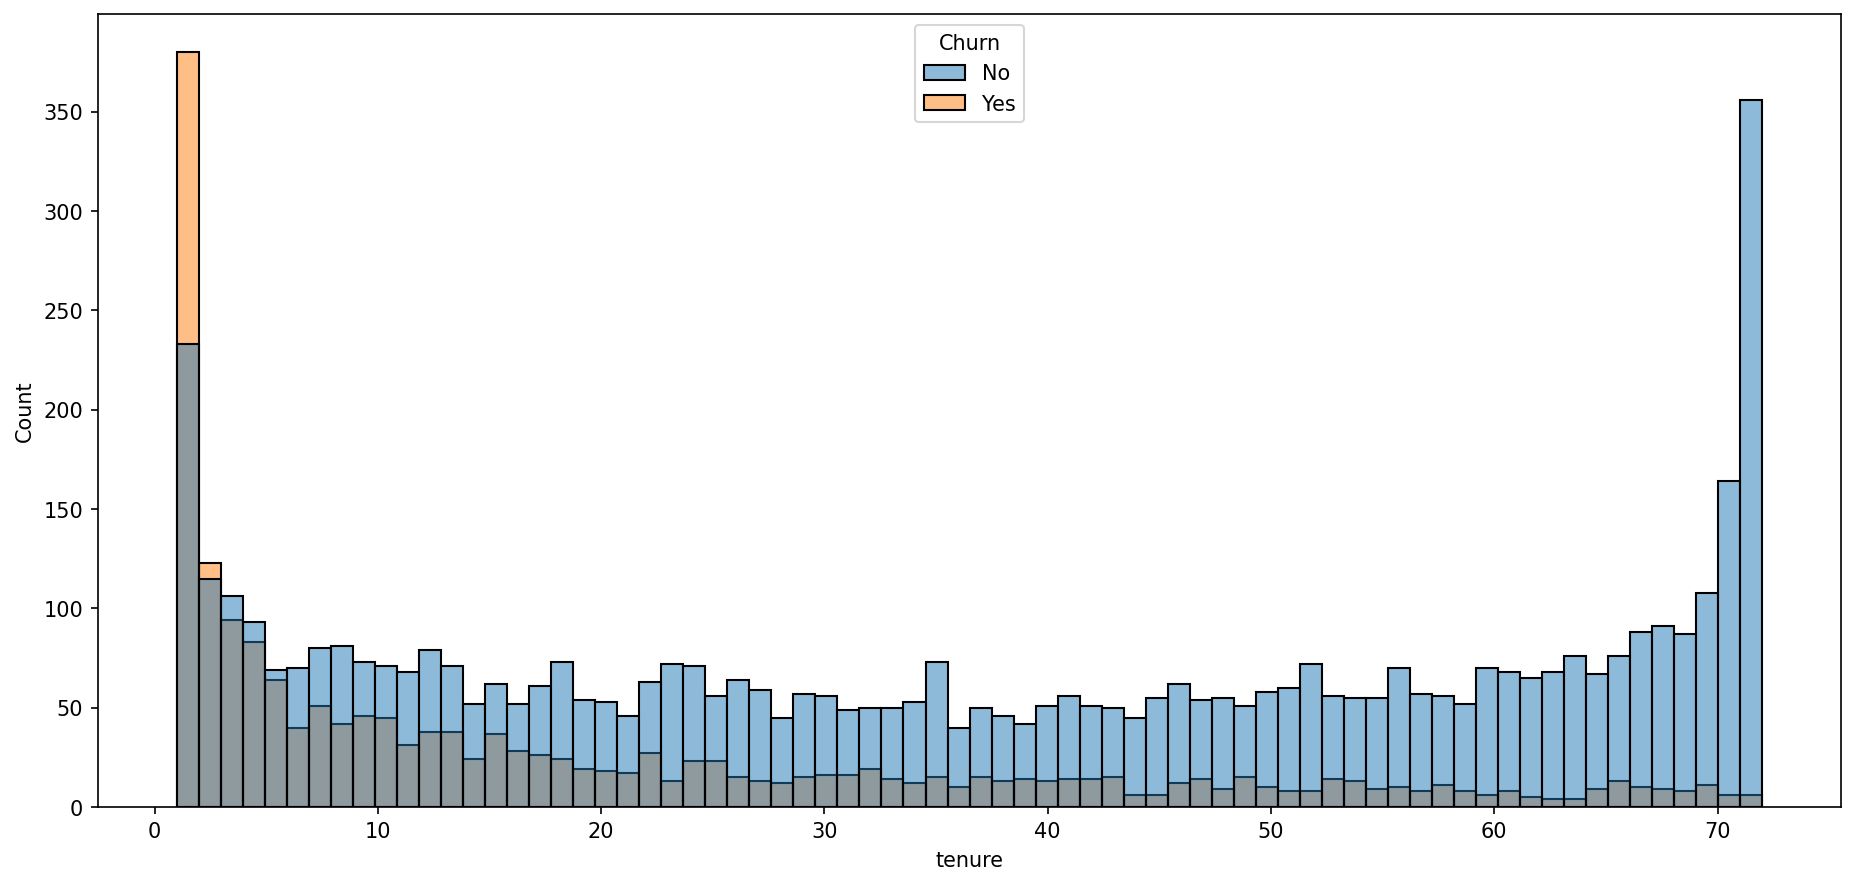

In [15]:
plt.figure(figsize=(15,7),dpi=150)
sns.histplot(data=df,x='tenure',bins=72,hue='Churn');

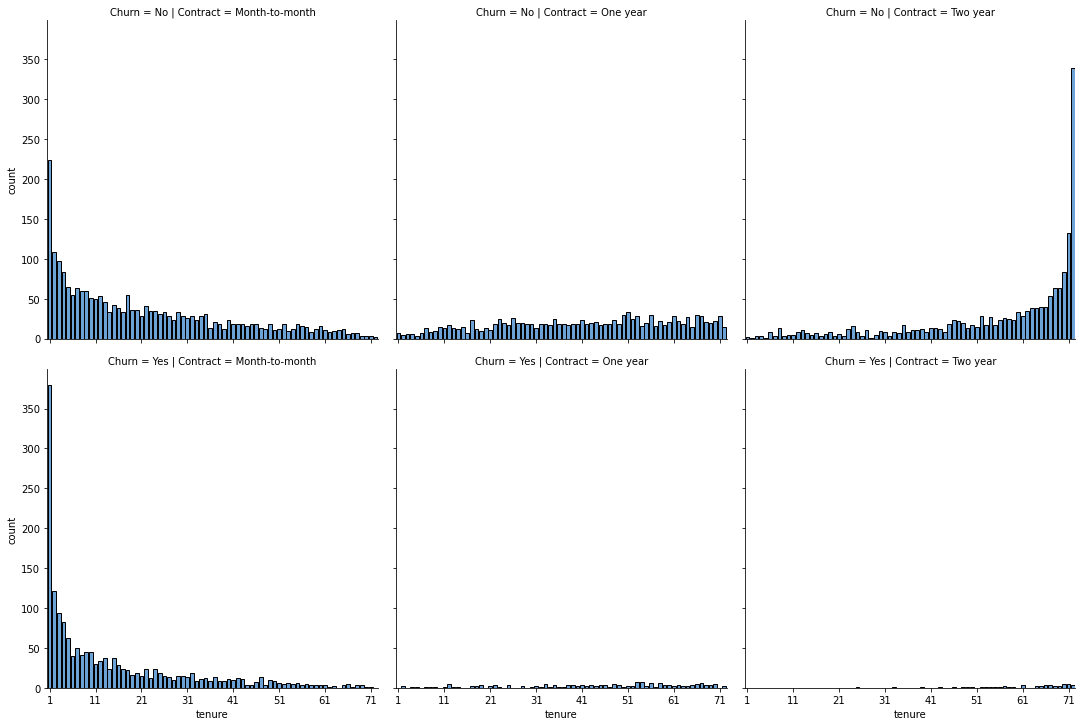

In [21]:
sns.catplot(data=df,x='tenure',kind='count',row='Churn',col='Contract',color='#5aa3e8',edgecolor='black')
plt.xticks(range(0,75,10));

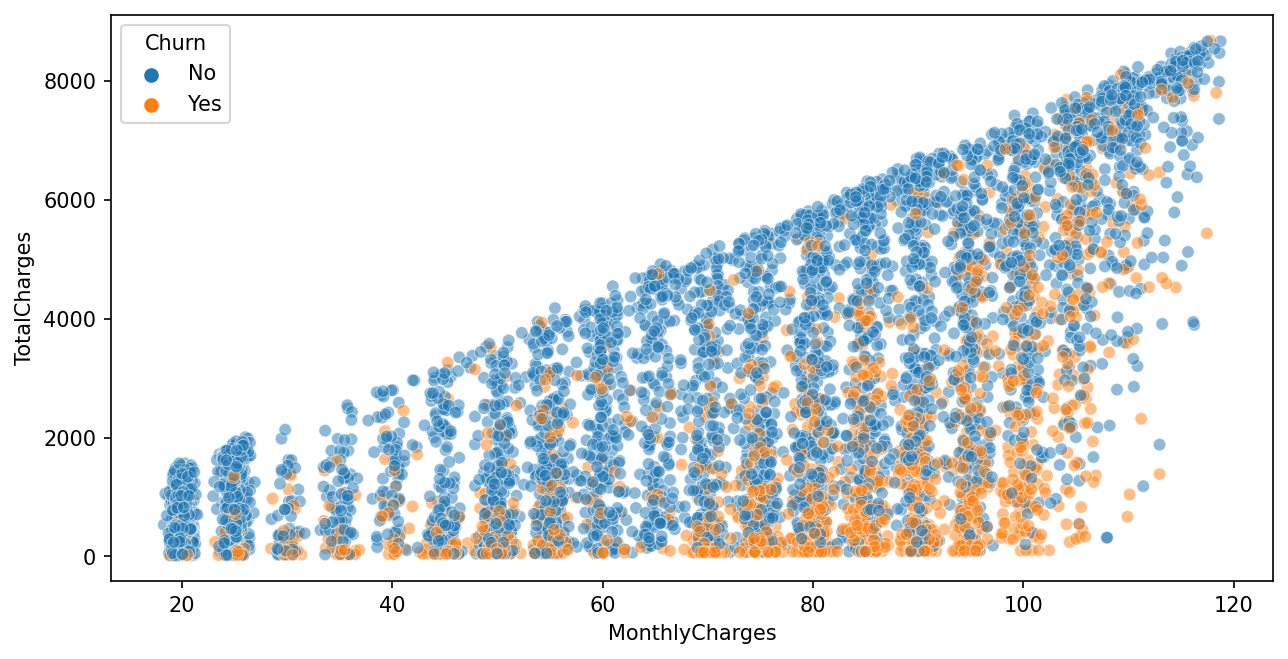

In [22]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5);

In [23]:
def month_group(tenure):
    if tenure < 12:
        return '0-12 Months'
    elif 12 <= tenure and tenure < 24:
        return '12-24 Months'
    elif tenure >= 48:
        return 'Over 48 Months'
    else:
        return '24-48 Months'

In [24]:
df['Tenure Cohort'] = df['tenure'].apply(month_group)

In [25]:
df[['tenure','Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


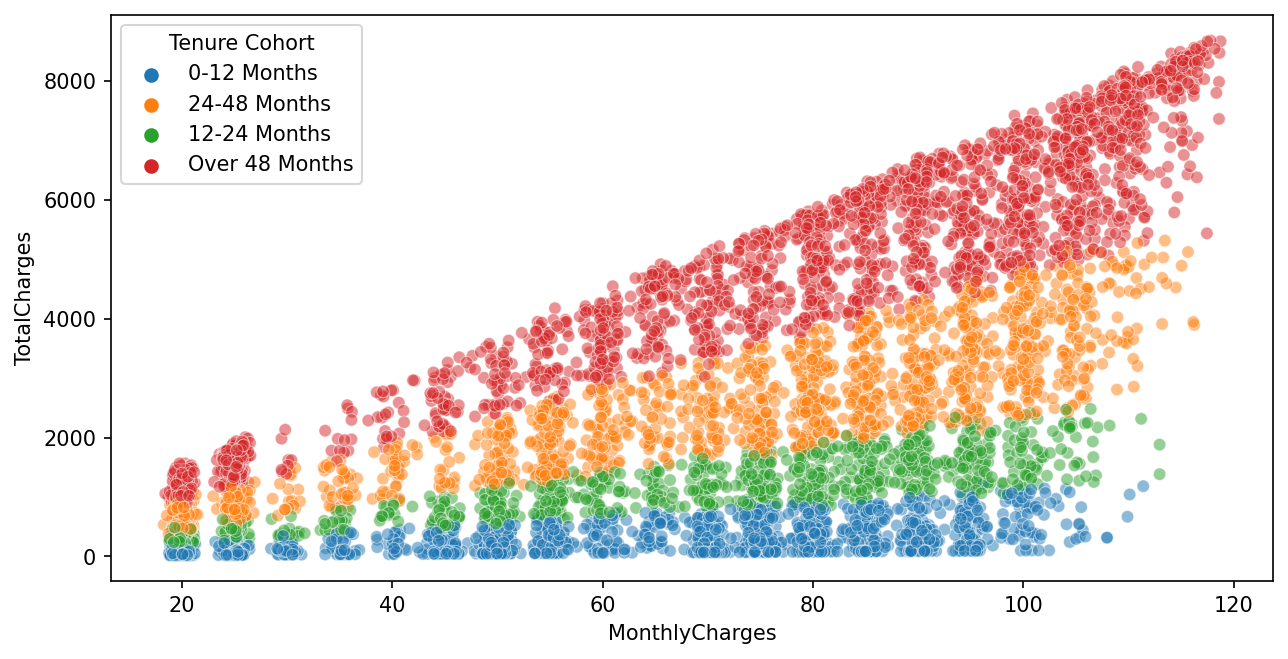

In [26]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',alpha=0.5);

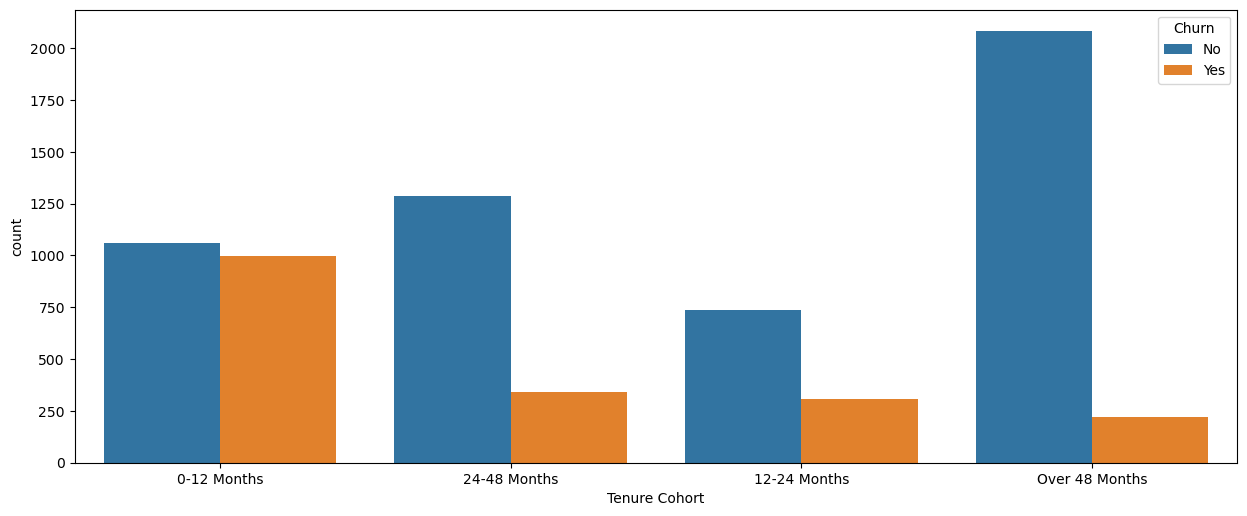

In [27]:
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn');

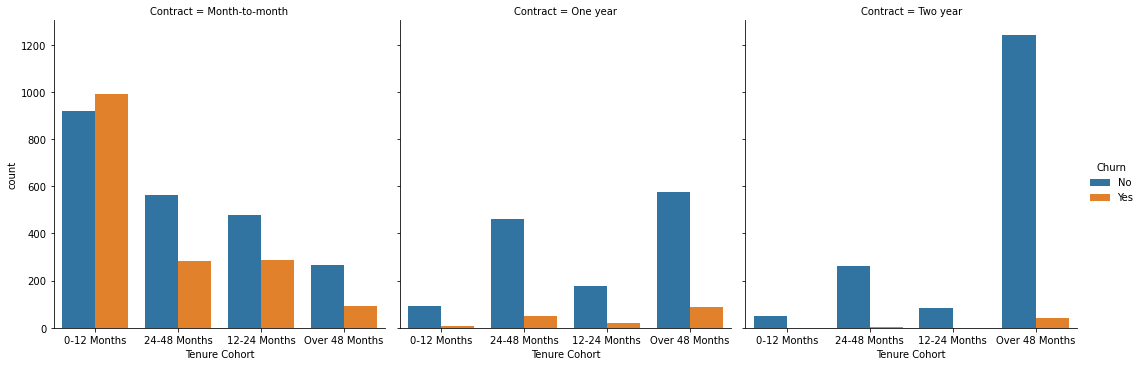

In [28]:
sns.catplot(data=df,x='Tenure Cohort',kind='count',col='Contract',hue='Churn');

### Predictive Modeling. 

In [29]:
X1 = df.drop(columns=['customerID','Churn','Tenure Cohort'],axis=1)
y = df['Churn']

In [30]:
X = pd.get_dummies(data=X1,drop_first=True)

In [31]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Decision Tree

In [35]:
decision_model = DecisionTreeClassifier(max_depth=6)

In [36]:
decision_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [37]:
test_preds = decision_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [39]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



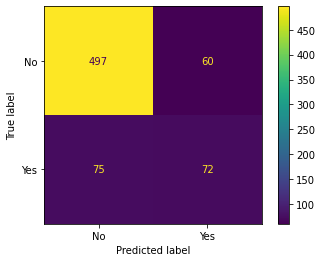

In [40]:
plot_confusion_matrix(decision_model,X_test,y_test)

In [41]:
imp_features = pd.DataFrame(data=decision_model.feature_importances_,index=X.columns,columns=['Feature Importance'])
imp_features = imp_features.sort_values('Feature Importance')

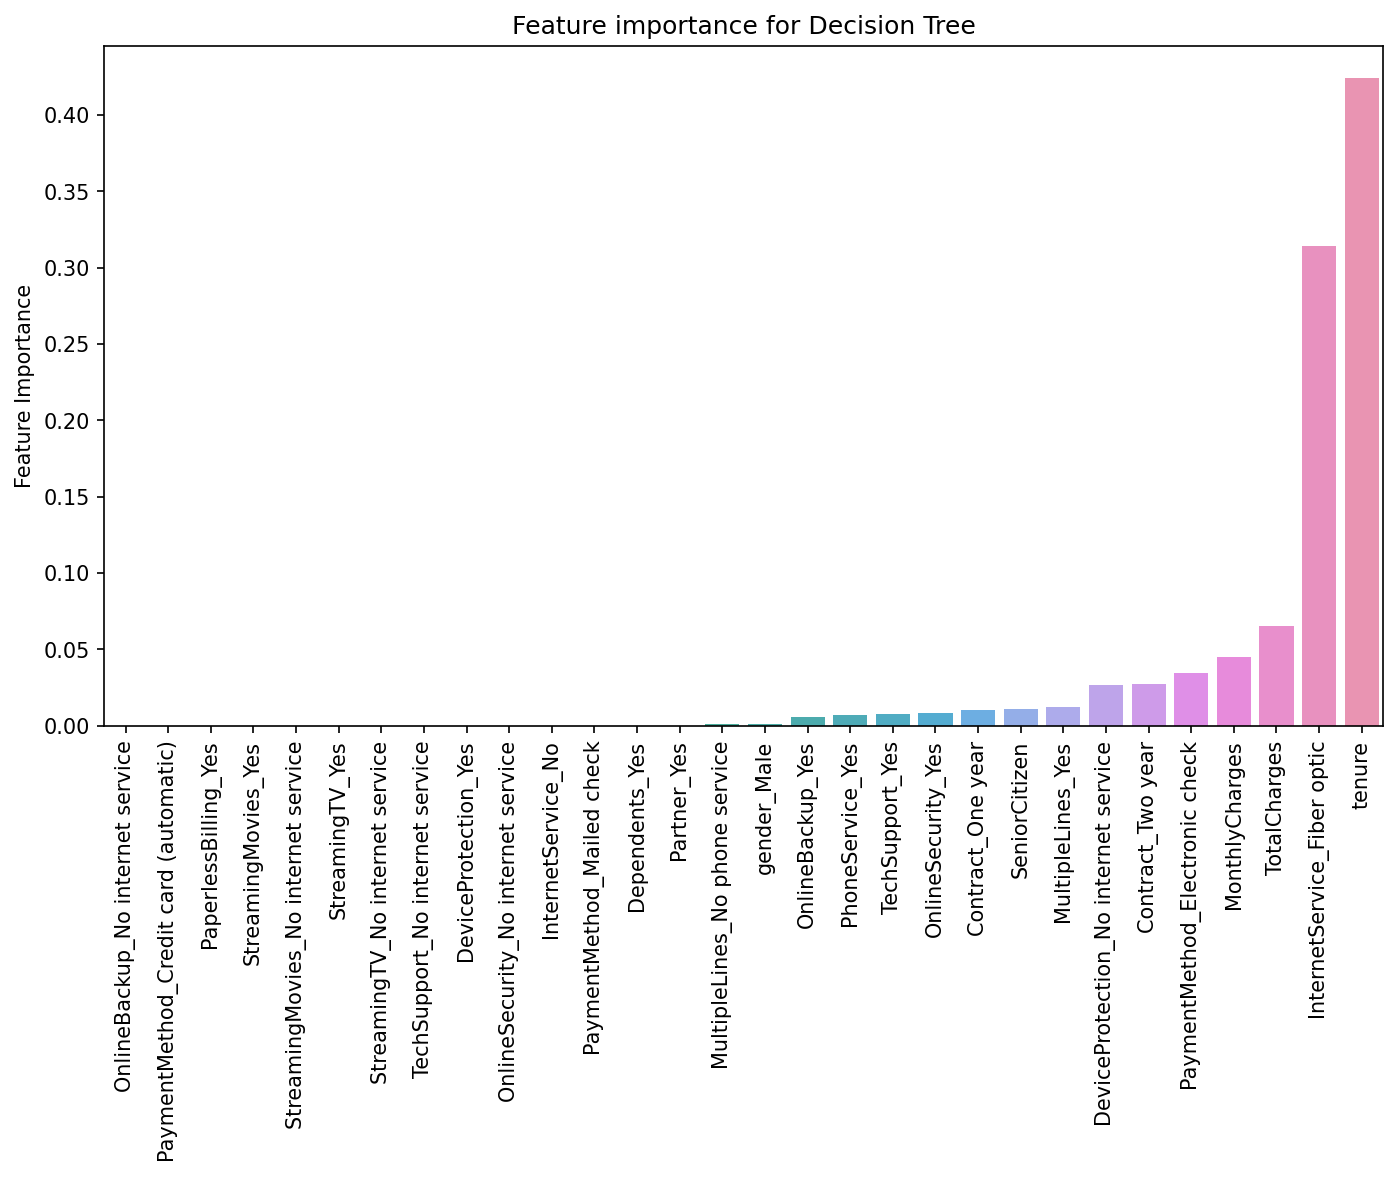

In [42]:
plt.figure(figsize=(11,6),dpi=150)
sns.barplot(data=imp_features.sort_values('Feature Importance'),x=imp_features.index,y='Feature Importance')
plt.title('Feature importance for Decision Tree')
plt.xticks(rotation=90);

### Random Forest

In [43]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [44]:
randomforest_model = RandomForestClassifier()

In [45]:
randomforest_model.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
y_preds = randomforest_model.predict(X_test)

In [47]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.46      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.68       704
weighted avg       0.79      0.79      0.79       704



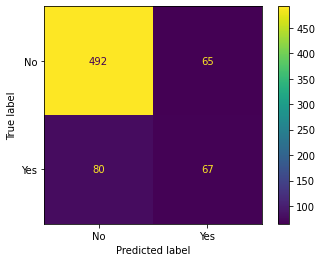

In [48]:
plot_confusion_matrix(randomforest_model,X_test,y_test)

#### Random Forest CV

In [67]:
params_grid = {'n_estimators':[100,120,125],'criterion':['gini','entropy']}

In [68]:
rf_grid = GridSearchCV(randomforest_model,params_grid,scoring='accuracy')

In [69]:
rf_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 120, 125]},
             scoring='accuracy')

In [70]:
rf_grid.best_params_

{'criterion': 'entropy', 'n_estimators': 120}

In [71]:
rfcv_preds = rf_grid.predict(X_test)

In [72]:
print(classification_report(y_test,rfcv_preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.49      0.44      0.46       147

    accuracy                           0.79       704
   macro avg       0.67      0.66      0.67       704
weighted avg       0.78      0.79      0.78       704



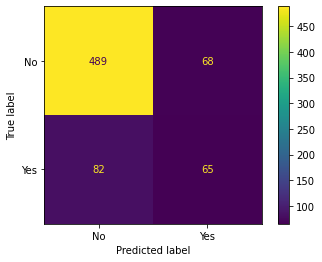

In [73]:
plot_confusion_matrix(rf_grid,X_test,y_test)

### Adaboost

In [74]:
ada_model = AdaBoostClassifier()

In [75]:
params_ada = {'learning_rate':[0.01,0.1,0.5,1,2],'n_estimators':[10,20,50,100,128]}

In [76]:
ada_cv = GridSearchCV(ada_model,params_ada)

In [77]:
ada_cv.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 2],
                         'n_estimators': [10, 20, 50, 100, 128]})

In [78]:
ada_cv.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [79]:
adacv_preds = ada_cv.predict(X_test)

In [80]:
print(classification_report(y_test,adacv_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



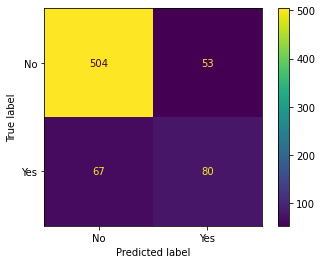

In [81]:
plot_confusion_matrix(ada_cv,X_test,y_test)

### Gradient Boosting

In [82]:
gradient_model = GradientBoostingClassifier()

In [83]:
params_gradient = {'learning_rate':[0.01,0.1,0.5,1],'n_estimators':[50,100,128],'max_depth':[3,4,5,6]}

In [84]:
gradient_cv = GridSearchCV(gradient_model,params_gradient)

In [85]:
gradient_cv.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 128]})

In [86]:
gradient_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [87]:
gradient_preds = gradient_cv.predict(X_test)

In [88]:
print(classification_report(y_test,gradient_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



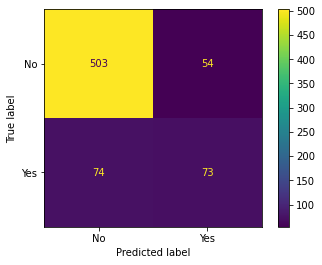

In [89]:
plot_confusion_matrix(gradient_cv,X_test,y_test)